# Portland Data Science Group
## Sentiment analysis (five week series)

### Week 1
Explore and build crudest possible model
-  Histogram of number of characters per comment
-  Histogram of scores
-  Does the comment contain the word "great": 1 if yes, 0 if no
-  Predict score based on the number of characters in the comment

In [5]:
# import data
import pandas as pd
reviews = pd.read_csv('Data/boardgame-comments-english.csv', low_memory=False)
reviews.columns = ['userID', 'gameID', 'rating', 'comment']

In [6]:
# check if column names have been updated
reviews.head(5)

,userID,gameID,rating,comment
0,172640,24068,7.0,Good: Unique take on the hidden role games. T...
1,86674,24068,7.0,A neat social deduction game with multiple tea...
2,10643,24068,7.0,Good hidden roles werewolf style game that can...
3,31171,24068,7.0,"Overall I hate Mafia/Werewolf, but this versio..."
4,165608,24068,7.0,Fun social deduction exercise that gets merrie...


#### Histogram of ratings

Highest rating:  10.0
Lowest rating:  1.4013e-45
Mean rating:  7.2016890870378365
Median rating:  7.1
Rating histogram: 


<IPython.core.display.Javascript object>


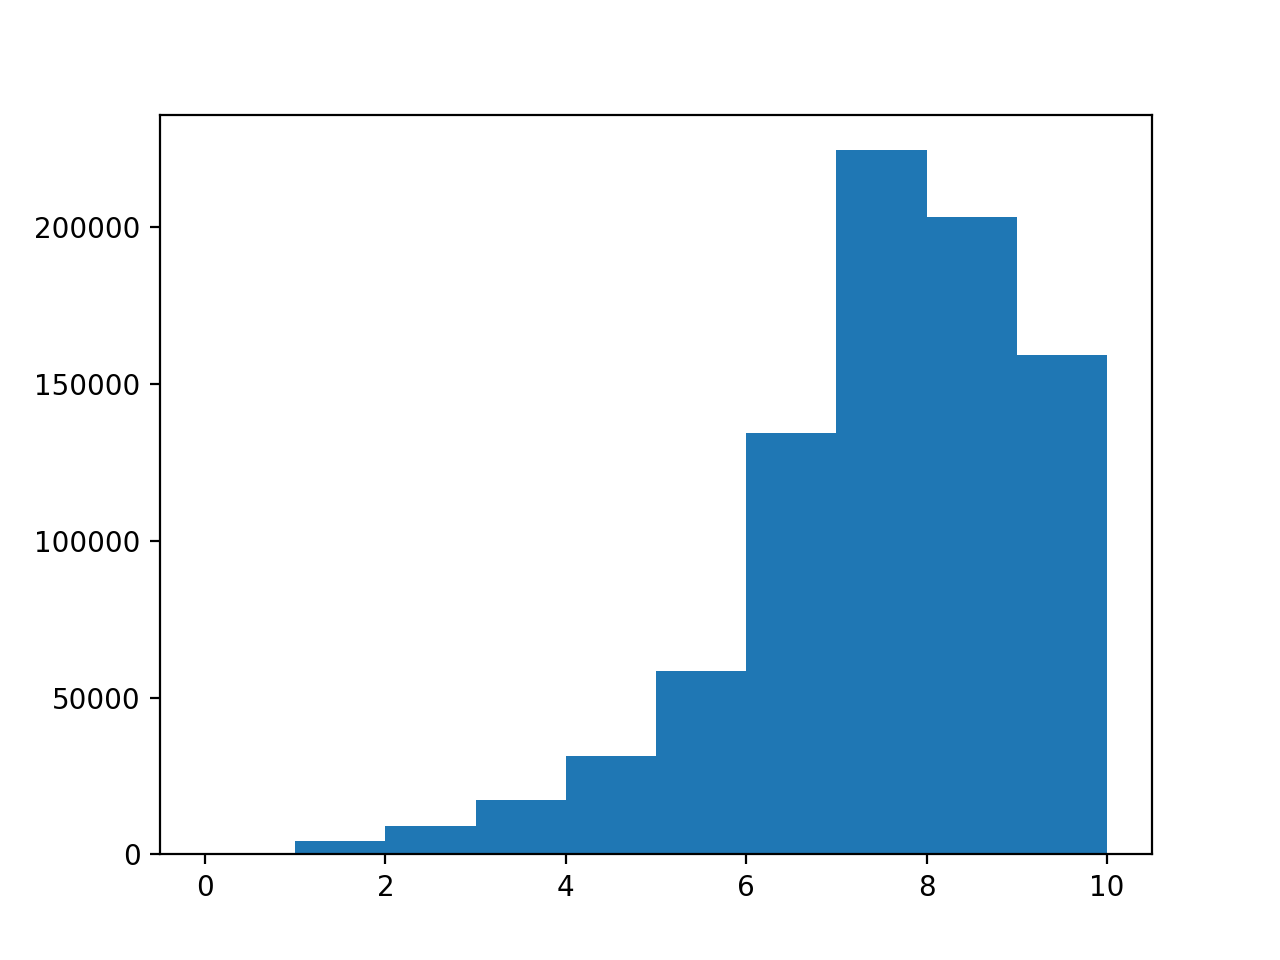

In [27]:
%matplotlib notebook
import matplotlib.pyplot as plt

print("Highest rating: ", reviews['rating'].max())
print("Lowest rating: ", reviews['rating'].min())
print("Mean rating: ", reviews['rating'].mean())
print("Median rating: ", reviews['rating'].median())
print("Rating histogram: ")
reviews['rating'].hist(grid = False)


#### Count number of games, number of users, and their play/played times

In [21]:
print('Number of games: ', len(reviews['gameID'].unique()))
print('Number of users: ', len(reviews['userID'].unique()))
print('Number of reviews: ', reviews.shape[0])
print('Number of reviews per game: ', reviews.shape[0]/len(reviews['gameID'].unique()))
print('Number of reviews per user: ', reviews.shape[0]/len(reviews['userID'].unique()))

Number of games:  402
Number of users:  59789
Number of reviews:  841645
Number of reviews per game:  2093.644278606965
Number of reviews per user:  14.076920503771596


<IPython.core.display.Javascript object>


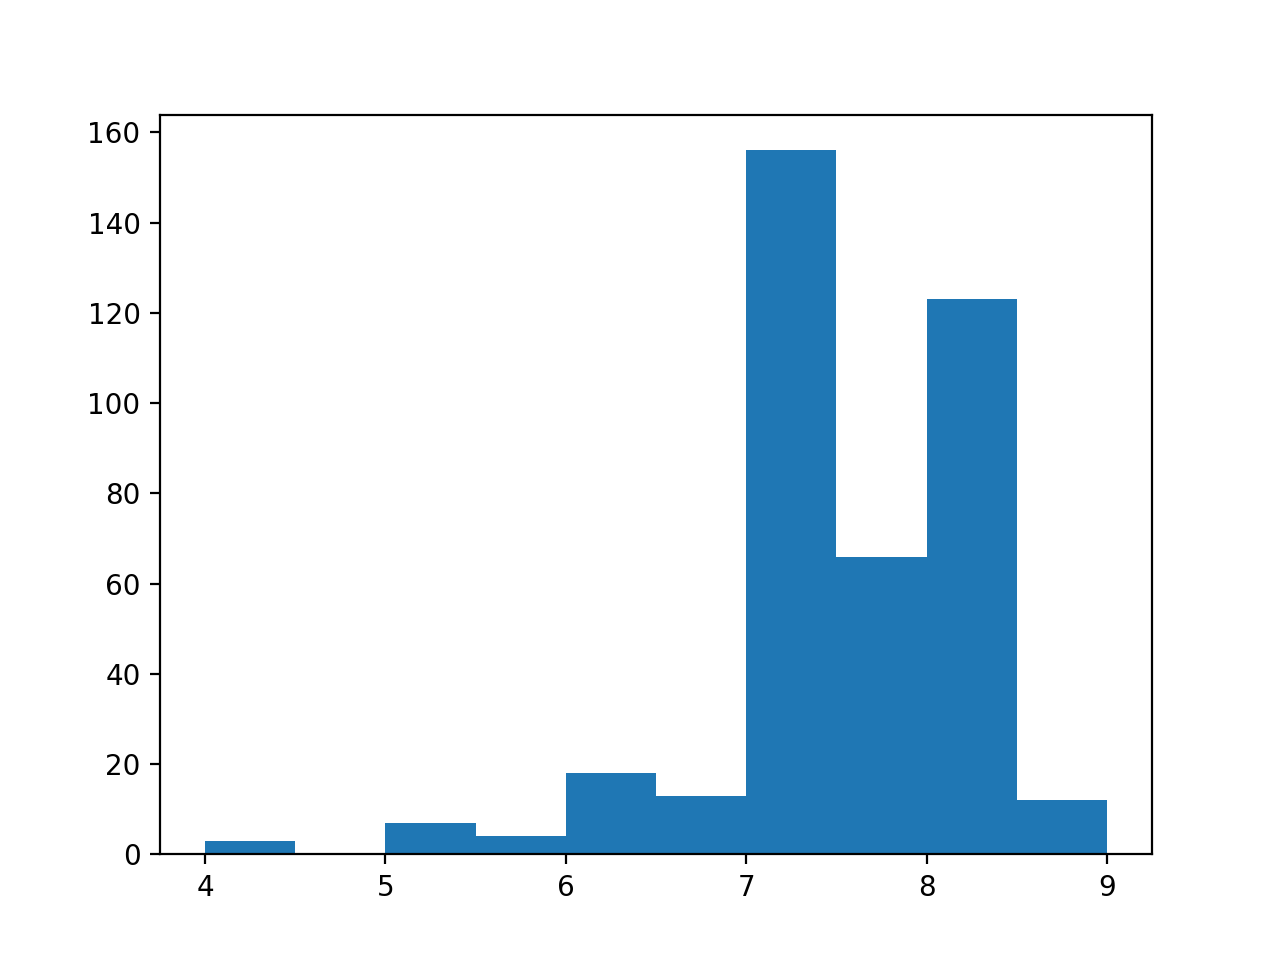

In [28]:
# histogram of game median ratings
reviews.groupby(['gameID'])['rating'].median().hist(grid = False)

<IPython.core.display.Javascript object>


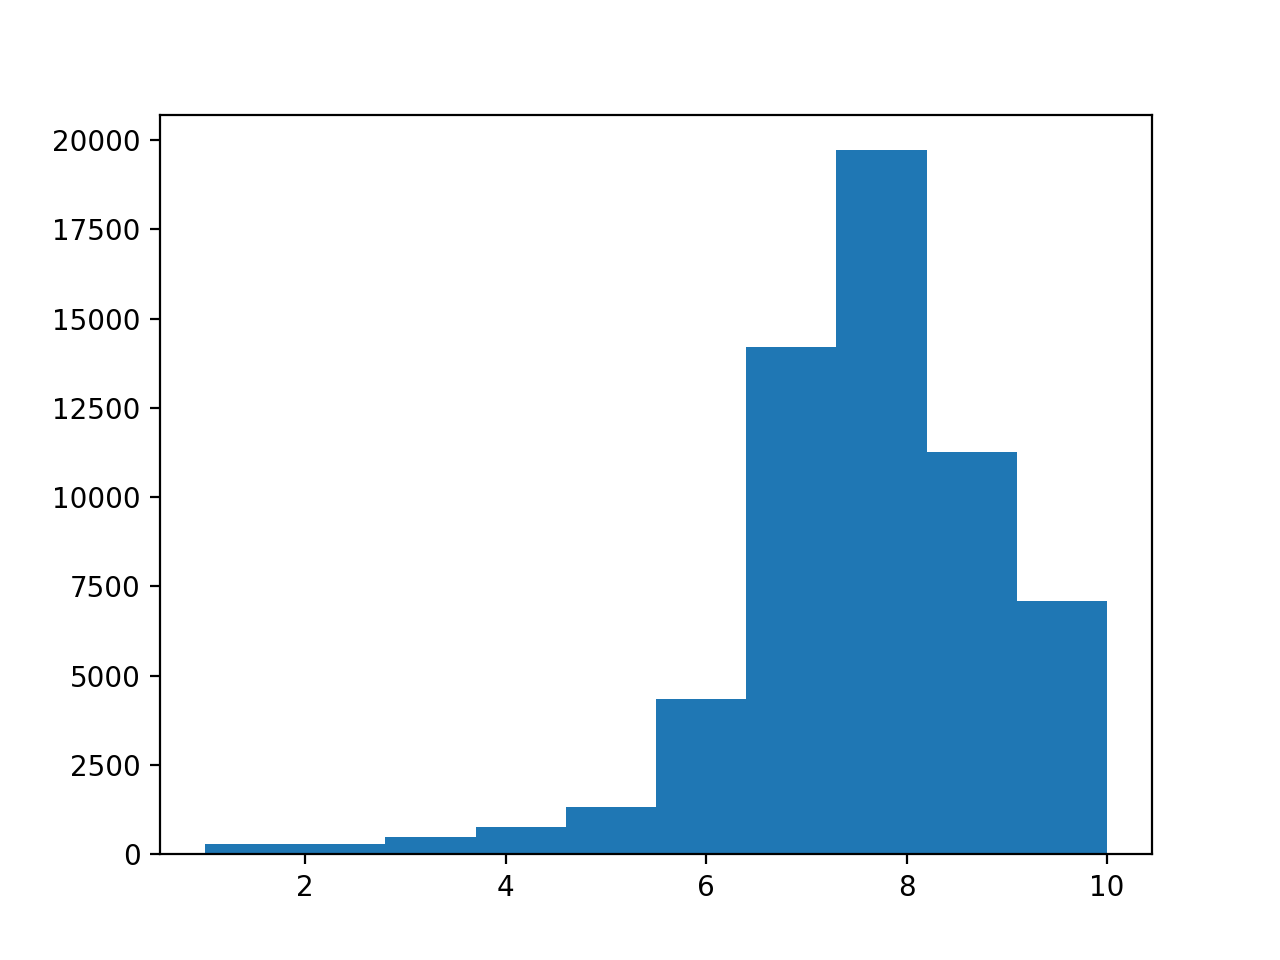

In [26]:
# histogram of user median ratings
reviews.groupby(['userID'])['rating'].median().hist(grid = False)

#### Add columns
-  Length of comment
-  Appearence of a specific word ('great' as Mat suggests)

In [29]:
reviews['comment_len'] = reviews['comment'].apply(lambda x:len(x.split()))
reviews.head()

,userID,gameID,rating,comment,comment_len
0,172640,24068,7.0,Good: Unique take on the hidden role games. T...,71
1,86674,24068,7.0,A neat social deduction game with multiple tea...,16
2,10643,24068,7.0,Good hidden roles werewolf style game that can...,34
3,31171,24068,7.0,"Overall I hate Mafia/Werewolf, but this versio...",63
4,165608,24068,7.0,Fun social deduction exercise that gets merrie...,57


In [40]:
print('Longest comment length: ', reviews['comment_len'].max())
print('Shortest comment length: ', reviews['comment_len'].min())
print('Median comment length: ', reviews['comment_len'].median())
print('100 longest comment length: ', reviews['comment_len'].nlargest(100))

Longest comment length:  4380
Shortest comment length:  1
Median comment length:  25.0
10 longest comment length:  811378    4380
275232    4370
566474    3451
642737    3374
749598    2813
263894    2726
351011    2546
764632    2462
649460    2406
673924    2229
695843    2204
471053    2086
543964    2078
107601    2039
187934    1991
501222    1964
527403    1959
786166    1944
374562    1830
187147    1820
595288    1820
132341    1782
224292    1766
475370    1757
607544    1710
839722    1641
7843      1638
787963    1592
97501     1562
154705    1559
          ... 
415849    1233
143975    1232
745124    1232
803742    1227
649099    1222
218604    1221
559164    1220
56677     1217
370080    1216
635001    1215
127158    1210
620257    1210
708456    1206
52644     1205
702149    1203
720330    1203
160961    1202
463265    1202
405410    1196
474395    1195
724540    1194
76438     1193
403216    1192
278851    1185
237894    1183
3238      1176
632278    1174
388627    1171


So there are quite many comments are very long so it's may be more reasonable to put a cap so that the histogram is reasonable. Let's use the number 500 for now. We do not want to rush to grouping so fast. So just say whatever greater than 500 equals to 500.

<IPython.core.display.Javascript object>


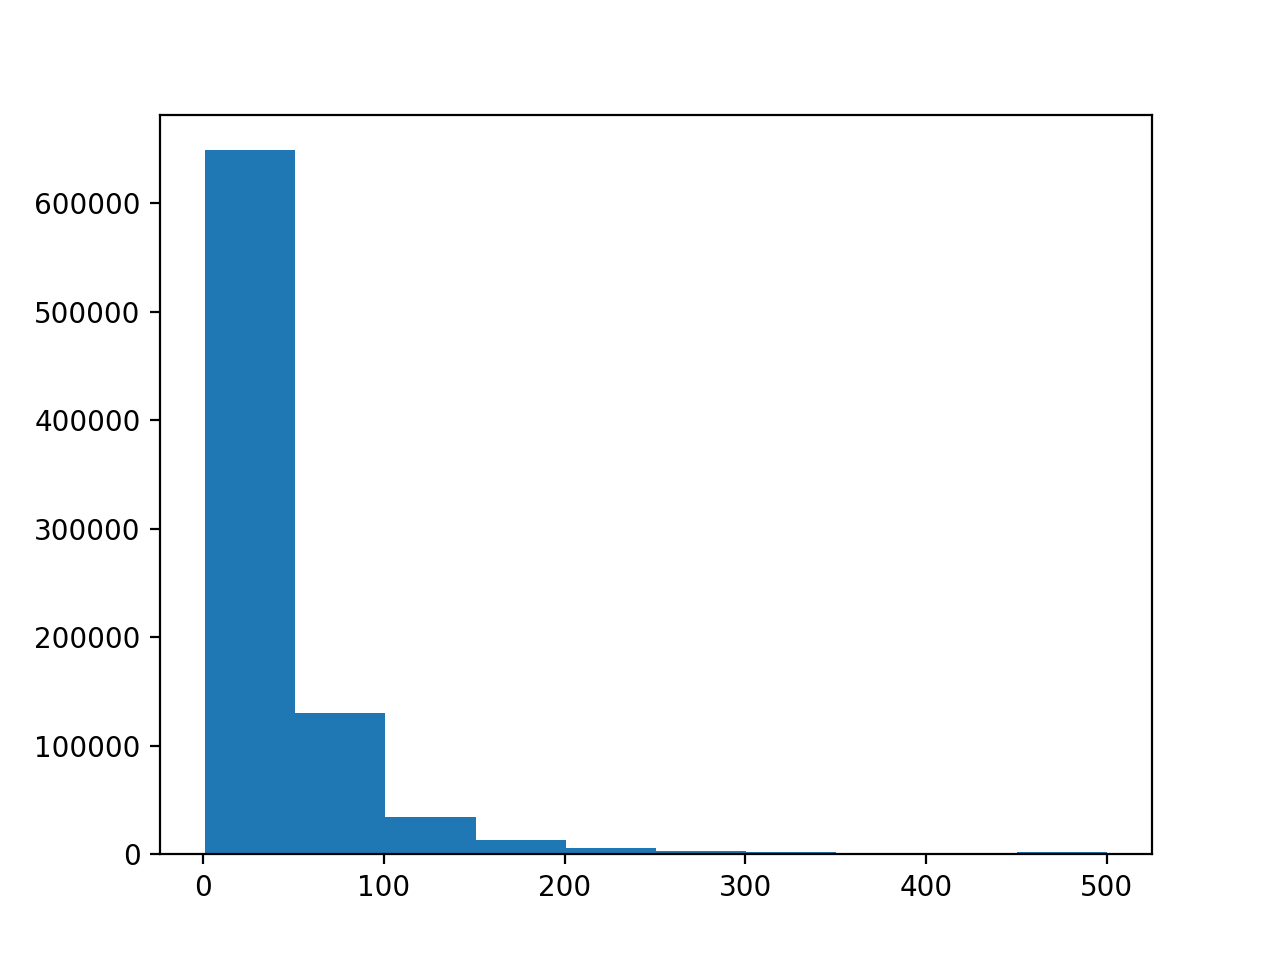

In [45]:
reviews['comment_len'] = reviews['comment_len'].apply(lambda x: 500 if x > 500 else x)
# Let's look at length of comments again
reviews['comment_len'].hist(grid = False)

Based on the above analysis, I think it's fairly safe to adjust the cap to 200 so we have more resolution

<IPython.core.display.Javascript object>


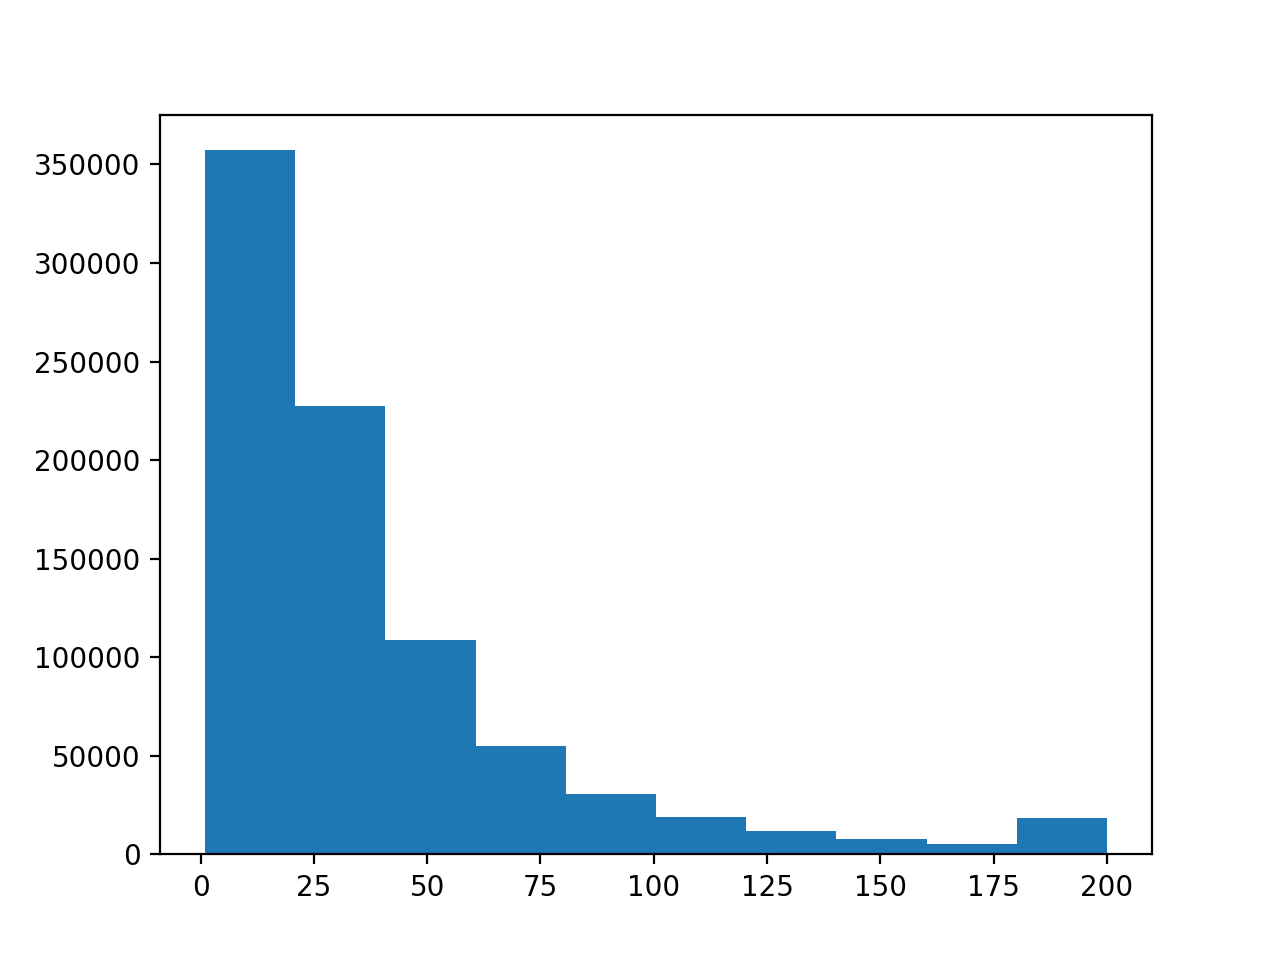

In [46]:
reviews['comment_len'] = reviews['comment_len'].apply(lambda x: 200 if x > 200 else x)
# Let's look at length of comments again
reviews['comment_len'].hist(grid = False)

#### Appearence of the word 'great' in comment

In [50]:
reviews['great_appear'] = reviews['comment'].apply(lambda x: 1 if 'great' in x.split() else 0)

Proportion of the word "great" appearing in comments:  0.07939095461863374


<IPython.core.display.Javascript object>


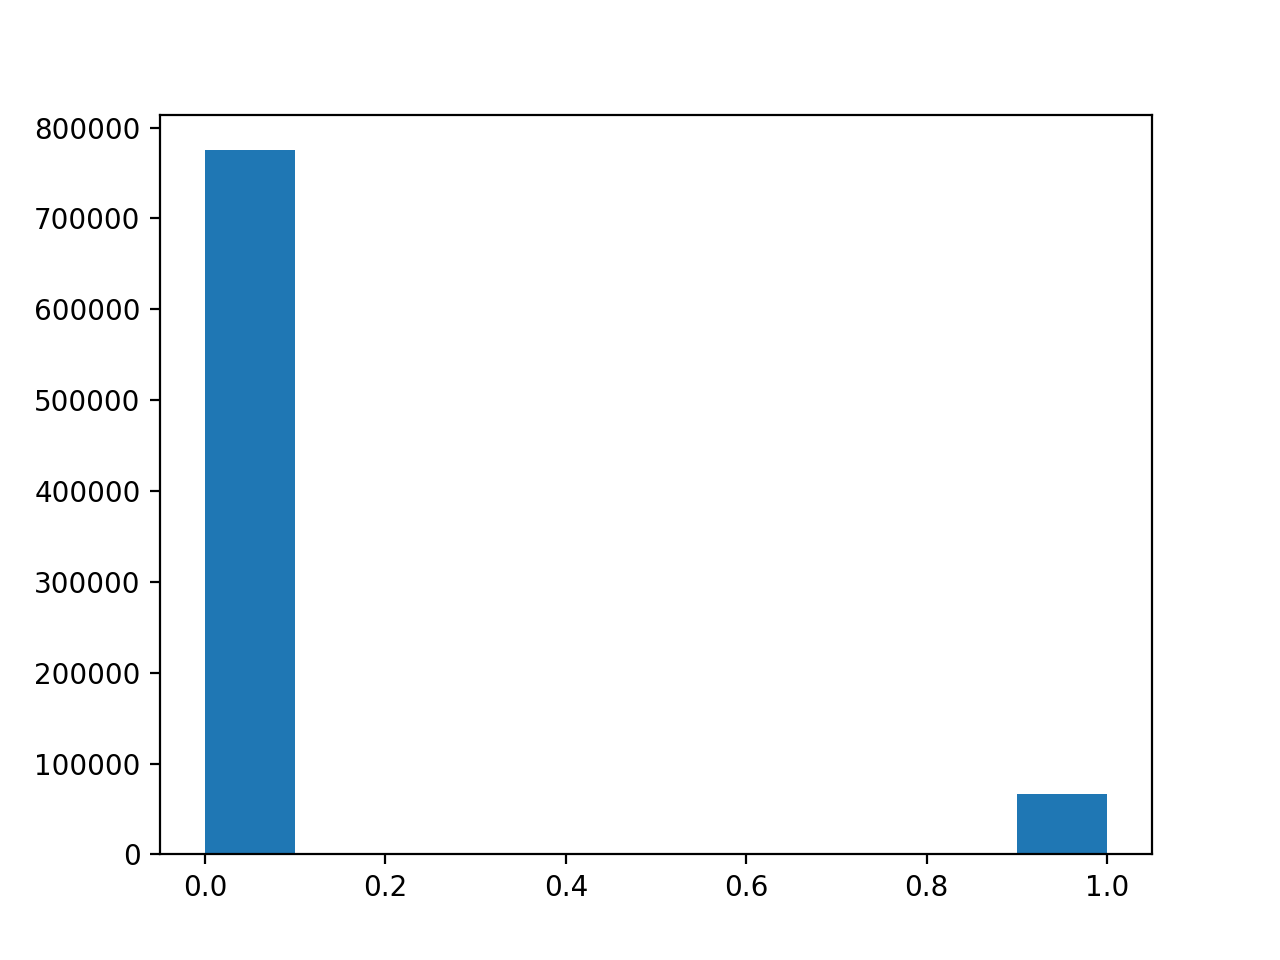

In [53]:
print('Proportion of the word "great" appearing in comments: ', reviews['great_appear'].mean())   # 8% !
reviews['great_appear'].hist(grid = False)  

#### A very simple linear regression model
Random sample 30% of data as our dev set

In [73]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

X = reviews[['comment_len', 'great_appear']]   # a continuous and a binary variable
y = reviews['rating']

In [74]:
# random split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [75]:
# create linear regression object
regr = linear_model.LinearRegression()
# train the model using the training set
regr.fit(X_train, y_train)
# make predictions on the development set
y_pred = regr.predict(X_test)

Mean squared error:  2.840423545808917


<IPython.core.display.Javascript object>


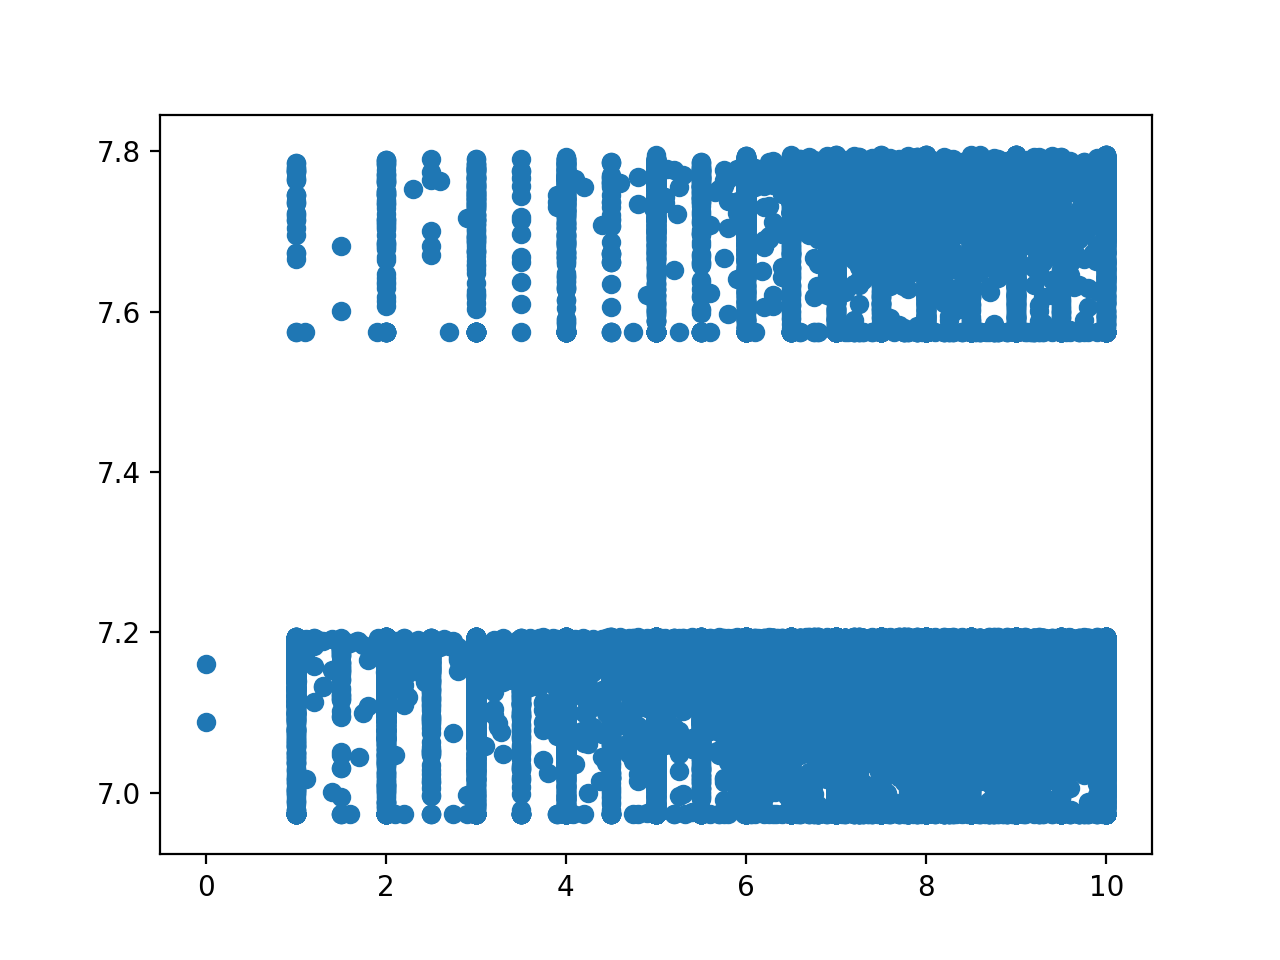

In [76]:
# check our prediction
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
plt.scatter(y_test, y_pred)

No clue why the range of y_pred is so narrow. The only explanantion I can think of is length of comment as a continuous variable is really not a good one (i.e., explain only very small amount of deviation) and therefore the model just uses the average rating as a baseline and add some value when the word 'great' appears and deduct some value when it does not. But this is an extremely simplied model and no accurate prediction is expected. So better to move on.